Recorte de imagen

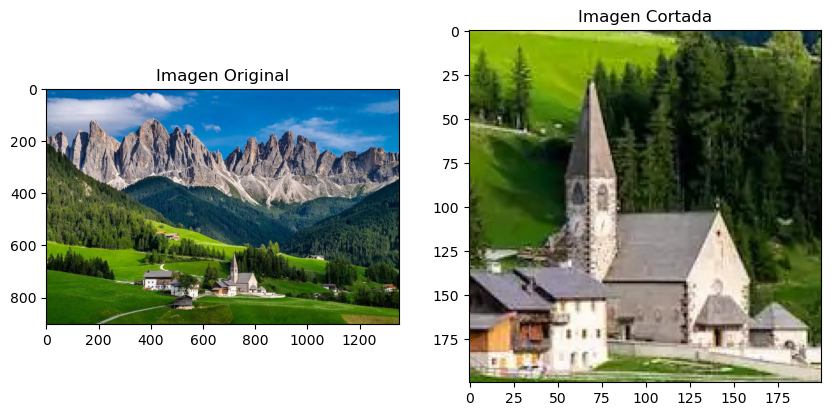

In [3]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt         

plt.rcParams['figure.figsize'] = [10, 5]


imagen = cv2.imread('imagenExamen.jpg')

imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(imagen_rgb)
plt.title("Imagen Original")

img_cortada = imagen_rgb[600:800, 650:850]
plt.subplot(1, 2, 2)
plt.imshow(img_cortada)
plt.title("Imagen Cortada")
cv2.imwrite('Iglesia.jpg', imagen)

plt.show()


DEGRADADO

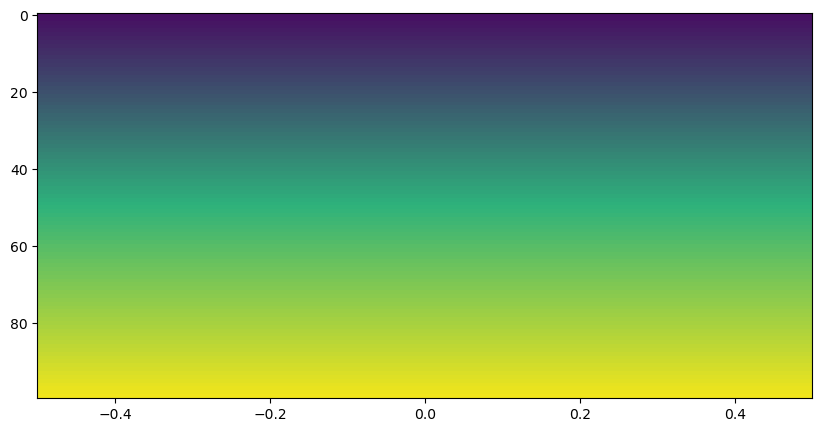

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

#definicion de colores

#colores=[(0,'black'),(1,'white')] #para genera escala de grises
colores=[(0,'#471063'),(0.5,'#2EB27C'),(1,'#F1E51C')] #para genera escala de grises

cmap= LinearSegmentedColormap.from_list('degradado',colores) #generamos a travez de nuestro array
imagen_degra=cmap(np.linspace(0,1,100).reshape(-1,1))


cv2.imwrite('imgDegra.jpg', imagen_degra)
plt.imshow(imagen_degra,aspect='auto')


plt.show()

Tamaño de cuadros de 100 px: 100


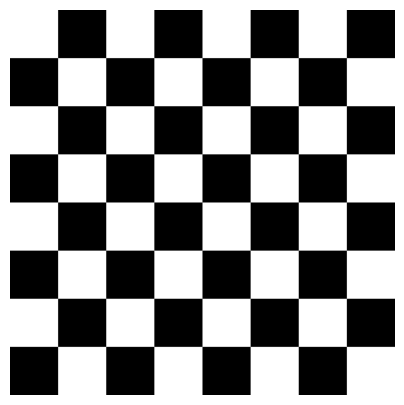

In [73]:
import matplotlib.pyplot as plt
import numpy as np
import cv2


tamanio_img = 800
cuadro = tamanio_img // 8 
print(f"Tamaño de cuadros de 100 px: {cuadro}")
imagen = np.zeros((tamanio_img, tamanio_img, 3), dtype=np.uint8)

for i in range(8):
    for j in range(8):
        if (i + j) % 2 == 0: 
            imagen[i * cuadro:(i + 1) * cuadro, j * cuadro:(j + 1) * cuadro] = [255, 255, 255]
cv2.imwrite('tablero_ajedrez.jpg', imagen)

plt.figure(figsize=(5, 5))
plt.imshow(imagen)
plt.axis('off')
plt.show()

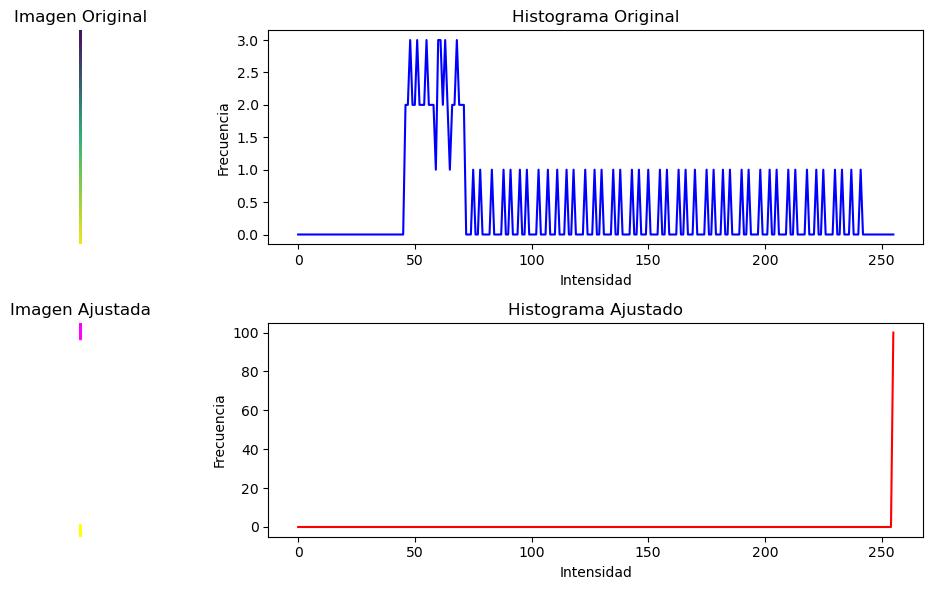

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

def ajustar(img, contraste=1.0, brillo=0):
    img = img.astype(np.float32) * 255  
    media = np.mean(img)
    img = media + (img - media) * contraste + brillo
    img = np.clip(img, 0, 255).astype(np.uint8)
    return img


colores = [(0, '#471063'), (0.5, '#2EB27C'), (1, '#F1E51C')]
cmap = LinearSegmentedColormap.from_list('degradado', colores)


imagen = (cmap(np.linspace(0, 1, 100).reshape(-1, 1))[:, :, :3] * 255).astype(np.uint8)


factor_brillo = 50
factor_contraste = 1.5
img_nueva = ajustar(imagen, factor_contraste, factor_brillo)


hist1 = cv2.calcHist([imagen], [0], None, [256], [0, 256])
hist2 = cv2.calcHist([img_nueva], [0], None, [256], [0, 256])


plt.figure(figsize=(12, 6))

plt.subplot(221)
plt.title('Imagen Original')
plt.imshow(imagen)
plt.axis('off')

plt.subplot(222)
plt.title('Histograma Original')
plt.plot(hist1, color='blue')
plt.xlabel('Intensidad')
plt.ylabel('Frecuencia')

plt.subplot(223)
plt.title('Imagen Ajustada')
plt.imshow(img_nueva)
plt.axis('off')

plt.subplot(224)
plt.title('Histograma Ajustado')
plt.plot(hist2, color='red')
plt.xlabel('Intensidad')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


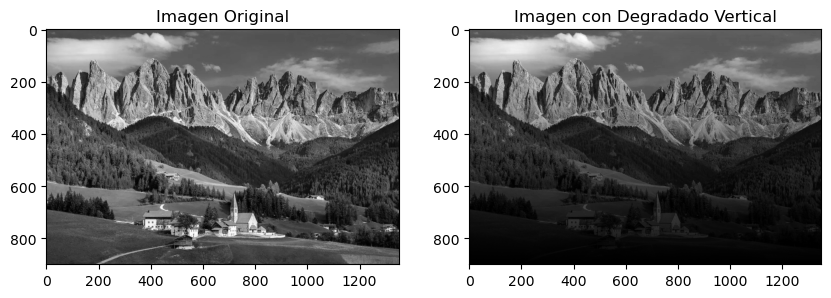

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img_path = 'imagenExamen.jpg'
image = cv2.imread(img_path, cv2.IMREAD_COLOR)

img_n = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

filas, columnas = img_n.shape
deg = np.linspace(1, 0, filas).reshape(-1, 1)  

degraded_image = (img_n * deg).astype(np.uint8)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_n, cmap='gray')
plt.title('Imagen Original')
plt.subplot(1, 2, 2)
plt.imshow(degraded_image, cmap='gray')
plt.title('Imagen con Degradado Vertical')
plt.show()
